# DATA 550 Mini-Project 2

- Group 14: Nathan Smith / Mitch Harris
- Date: Feb 11, 2021

In [1]:
import pandas as pd
import altair as alt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## Step 1: Describe the Dataset

The boardgame dataset includes dgames with their descriptions, general game details, and user ratings from the [Board Game Geek website](http://boardgamegeek.com/). 

The dataset was obtained from the R4DS TidyTuesday 2019-03-12 Github repository: https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-03-12. As described in the repository, the data comes from the Board Game Geek website database and general cleaning of the dataset has already been completed. The general cleaning limited the dataset to games with at least 50 ratings and for games between 1950 and 2016. The repository notes that this was done to follow a previous analysis completed by [fivethirtyeight](https://fivethirtyeight.com/features/designing-the-best-board-game-on-the-planet/).

The dataset columns descriptions as provided in the Github repository are as follows:

|variable       |class     |description |
|:--------------|:---------|:-----------|
|game_id        |character | Unique game identifier         |
|description    |character | A paragraph of text describing the game       |
|image          |character | URL image of the game            |
|max_players    |integer   | Maximum recommended players           |
|max_playtime   |integer   | Maximum recommended playtime (min)           |
|min_age        |integer   | Minimum recommended age          |
|min_players    |integer   | Minimum recommended players         |
|min_playtime   |integer   | Minimum recommended playtime (min)           |
|name           |character | Name of the game           |
|playing_time   |integer   | Average playtime           |
|thumbnail      |character | URL thumbnail of the game           |
|year_published |integer   | Year game was published           |
|artist         |character | Artist for game art           |
|category       |character | Categories for the game (separated by commas)           |
|compilation    |character | If part of a multi-compilation - name of compilation           |
|designer       |character | Game designer           |
|expansion      |character | If there is an expansion pack - name of expansion           |
|family         |character | Family of game - equivalent to a publisher          |
|mechanic       |character | Game mechanic - how game is played, separated by comma         |
|publisher      |character | Comoany/person who published the game, separated by comma        |
|average_rating |double    | Average rating on Board Games Geek (1-10)        |
|users_rated    |double    | Number of users that rated the game           |  

# Step 2: Load the Dataset

In [2]:
boardgame_data = pd.read_csv('board_games.csv')

Provide a view of the dataframe:

In [4]:
boardgame_data.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [5]:
boardgame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

## Step 3: Explore the Dataset

The view of the dataset from Step 2 shows that many of the categororical features (such as 'category', 'mechanic', and 'family') include multiple values for each entry. As such, these features may need to have their observations exploded during the analysis.

Now, look at a summary of the numerical columns in the dataset for reference during the EDA:

In [6]:
boardgame_data.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


Also look at the number of missing values in the dataset:

In [7]:
len_df = len(boardgame_data)
print('Dataset length: ', len_df)
na_totals = boardgame_data.isnull().sum()
na_percent = na_totals / len_df * 100
na_df = pd.concat([na_totals, na_percent], axis=1)
na_df.columns = ['count_na', 'percent_na']
na_df

Dataset length:  10532


,count_na,percent_na
game_id,0,0.000000
description,0,0.000000
image,1,0.009495
max_players,0,0.000000
max_playtime,0,0.000000
min_age,0,0.000000
min_players,0,0.000000
min_playtime,0,0.000000
name,0,0.000000
playing_time,0,0.000000


The missing data summary shows the following:
- Game detail features (minimum age, minimum number of player, etc) and year published are not missing any data.
- Rating features are not missing data which is a function of the cleaning already completed for the dataset.
- The compilation' and expansion features are missing values for most of the dataframe. However, the dataset descriptions for these columns note that they're for games that belong to compilations or have an expansion pack; therefore the lack of data may not just be due to missing values but from the fact that they do not have these.
- Game category is missing a very small number of entries such that it should not have a large impact on an anlaysis.
- There are are moderate number of missing entries for game family, mechanic which will need to be kept in mind during the analysis.
- There are a high number of missing values for artist' and designer but there are almost no missing data for publisher.

## Step 4: Initial Thoughts

Initial thoughts on the dataset include:

- The game details features are complete in the dataset but from a quick view of the numeric summaries, there are values that may be erroneous and require filtering during wrangling or visualizations. For example, the 'max_players' feature has a maximum value of 999 nd 'min_age' has a maximum value of 42.
- The dataset ranges from 1950 to 2016 but the 50th percentile for 'year_published' is 2007 indicating the most of the games in the dataset are more recent. This could be due to a higher number of games published more recently or due to lack of information/availability of older games which seems more likely.
- 'artist' and 'designer' should potentially be dropped from the dataset as they have a much higher number of missing values compared with 'publisher'.
- If looking to analyze'mechanic' or 'family', the higher number of missing values will need to be kept in mind during the analysis.
- There appears to be a reasonable distribution from approxmately 1 to 10 in the 'user_rating' feature but there is a high range in the 'users_rated' feature with values from a minimum of 50 to a maximum of over 65,000.

## Step 5: Wrangling

In [9]:
# Add wrangling as required to support Step 7 on an as needed basis to avoid useless wrangling

The following wrangling has been completed to support the data visualization complete in Step 7:

In [10]:
# Explode game categories

In [11]:
category_ratings_df = boardgame_data.copy()
category_ratings_df['category'] = category_ratings_df['category'].str.split(",")
category_ratings_df = category_ratings_df.explode('category')
category_ratings_df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Economic,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Negotiation,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,Political,NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,Card Game,NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,Fantasy,NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478


In [12]:
category_ratings_df_cut = category_ratings_df.groupby('category').filter(lambda x: len(x) > 200)

In [13]:
category_by_rating = category_ratings_df_cut.groupby('category')["average_rating"].median().sort_values(ascending=False).index.to_list()

In [14]:
# wrangling on dataset that looks at game features (min/max players etc), maybe create a new feature which is player range (2-4 players etc)
# likely bin playtime

In [20]:
features_df = boardgame_data.copy()
features_df = features_df[(features_df['max_players'] != features_df['max_players'].max()) & features_df['max_players'] > 0]

In [23]:
features_df_2 = features_df[(features_df['max_players'] < 20)].copy()

In [46]:
features_df_3 = features_df_2[(features_df_2['min_playtime'] <= 1000) & (features_df_3['max_playtime'] <= 2000)].copy()

## Step 6: Research Questions

The following research questions are based on the descriptions of the features available in the dataset and the initial exploration above:

- Which boardgame categories are more popular in terms of rating value and number of ratings? Number of ratings could potentially be thought of as a proxy for number of users although there are a lot of assumptions associated with this as users of some categories may be more likely to post reviews.
- Are there game feature values (minimum/maximum number of players, minimum/maximum playtime, etc) that have higher ratings or number of ratings associated with them?
- How has the categories or game features of published games changed over time?


## Step 7: Data Analysis and Visualization

The first data analysis will focus on assessing the popularity of gameboard categories using the average game rating. Any game with a category count of less than 200 has been screened out.

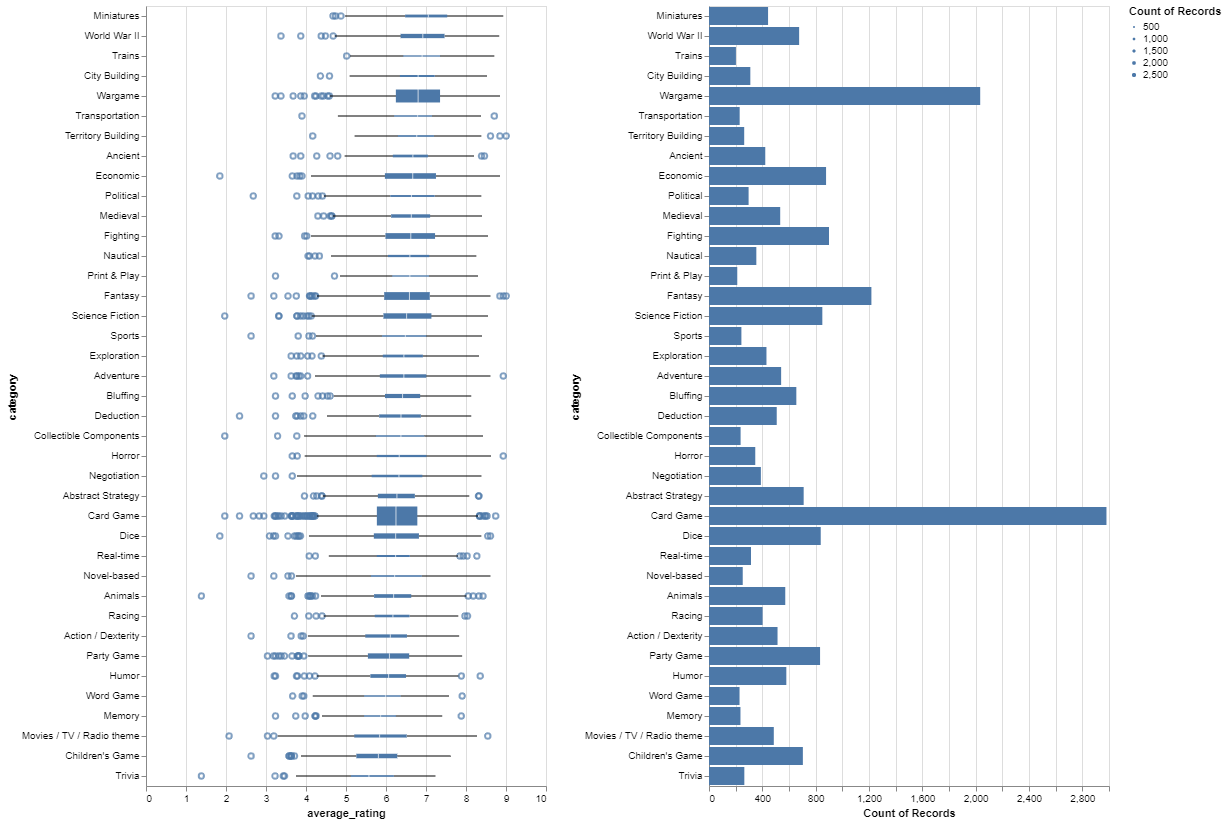

In [16]:
ch1 = (alt.Chart(category_ratings_df_cut).mark_boxplot().encode(
    x=alt.X('average_rating'),
    y=alt.Y('category', sort=category_by_rating),
    size='count()',
))

ch2 = (alt.Chart(category_ratings_df_cut).mark_bar().encode(
    x=alt.X('count()'),
    y=alt.Y('category', sort=category_by_rating)
))

#ch3 = (alt.Chart(category_ratings_df_cut).mark_boxplot().encode(
#    x=alt.X('users_rated', scale=alt.Scale(type='log')),
#    y=alt.Y('category', sort=category_by_rating),
#    size='count()'
#))

#ch1 | ch2 | ch3
ch1 | ch2

Draft comments: Miniatures, World War II, and Trains have the highest rating; whearas Triva represents the lowest game. Wargames, Fantasy and Cardgames have the highest counts and the boxplots indicate that these categories have a wide spread of rating with many higher average rating values.

### For the above I think this is a general plot type that we want to go with - not sure if there's something else that can be done with it....need to remove 

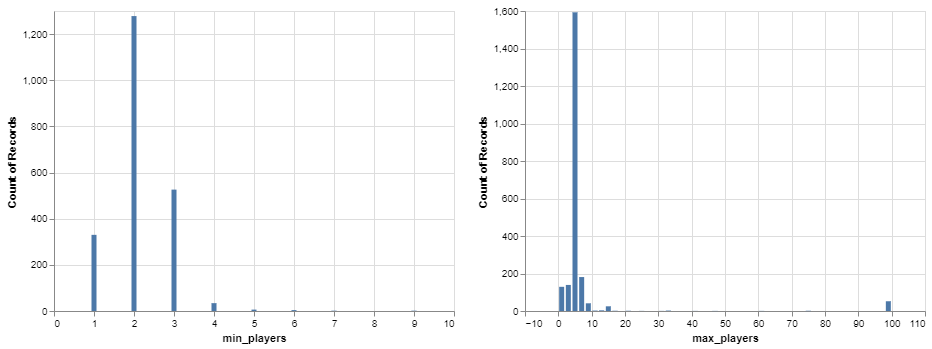

In [22]:
cha = (alt.Chart(features_df).mark_bar().encode(
    x=alt.Y('min_players'),
    y=alt.X('count()'),  
))

chb = (alt.Chart(features_df).mark_bar(clip=True).encode(
    x=alt.Y('max_players', scale=alt.Scale(domain=(0, 100))),
    y=alt.X('count()', ),  
))

cha | chb

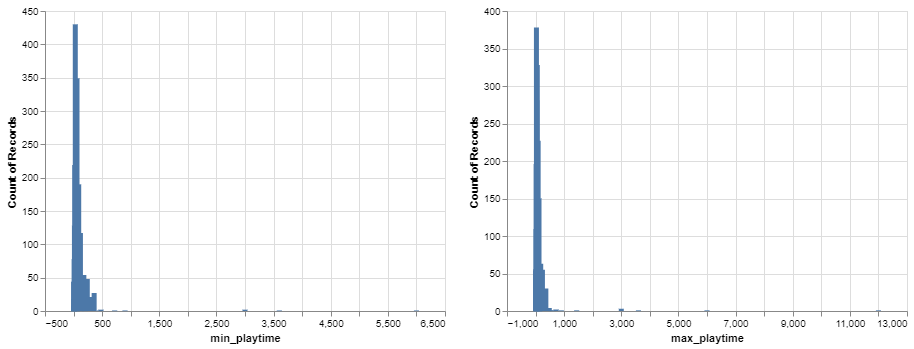

In [29]:
cha = (alt.Chart(features_df).mark_bar().encode(
    x=alt.Y('min_playtime'),
    y=alt.X('count()'),  
))

chb = (alt.Chart(features_df).mark_bar().encode(
    x=alt.Y('max_playtime'),
    y=alt.X('count()', ),  
))

cha | chb

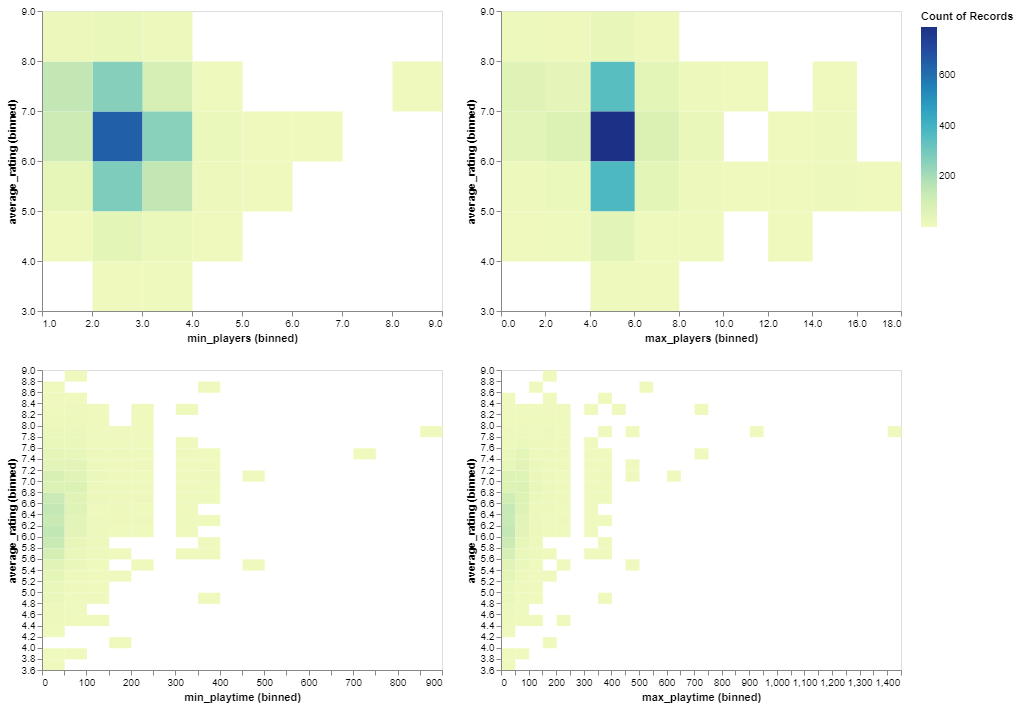

In [50]:
# potentially do something like this - another option is doing two heatmap plots although it's somewhat nice to be able to see the counts

the1 = alt.Chart(features_df_3).mark_rect().encode(
    alt.X('min_playtime', bin=alt.Bin(maxbins=40)),
    alt.Y('average_rating', bin=alt.Bin(maxbins=40)),
alt.Color('count()'))

the2 = alt.Chart(features_df_3).mark_rect().encode(
    alt.X('max_playtime', bin=alt.Bin(maxbins=40)),
    alt.Y('average_rating', bin=alt.Bin(maxbins=40)),
alt.Color('count()'))

num1 = (alt.Chart(features_df_2).mark_rect().encode(
    alt.X('min_players', bin=alt.Bin(maxbins=10)),
    alt.Y('average_rating', bin=alt.Bin(maxbins=10)),
alt.Color('count()')))

num2 = (alt.Chart(features_df_2).mark_rect().encode(
    alt.X('max_players', bin=alt.Bin(maxbins=10)),
    alt.Y('average_rating', bin=alt.Bin(maxbins=10)),
alt.Color('count()')))

(num1 | num2) & (the1 | the2)


# just playing around with plots

indicates that gameplay and number of players shouldn't really matter, there are more short games but the have a a higher spread in ratings, infact it looks like slightly longer games trend to having higher rating although there are less of them

In [ ]:
# another plot related to publishing data maybe

In [ ]:
# potentially another plot with an aggregate of a few plots trying to at a subset of categories identified in the first plot tryihg to show some things

## Step 8: Summary and Conclusion